In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


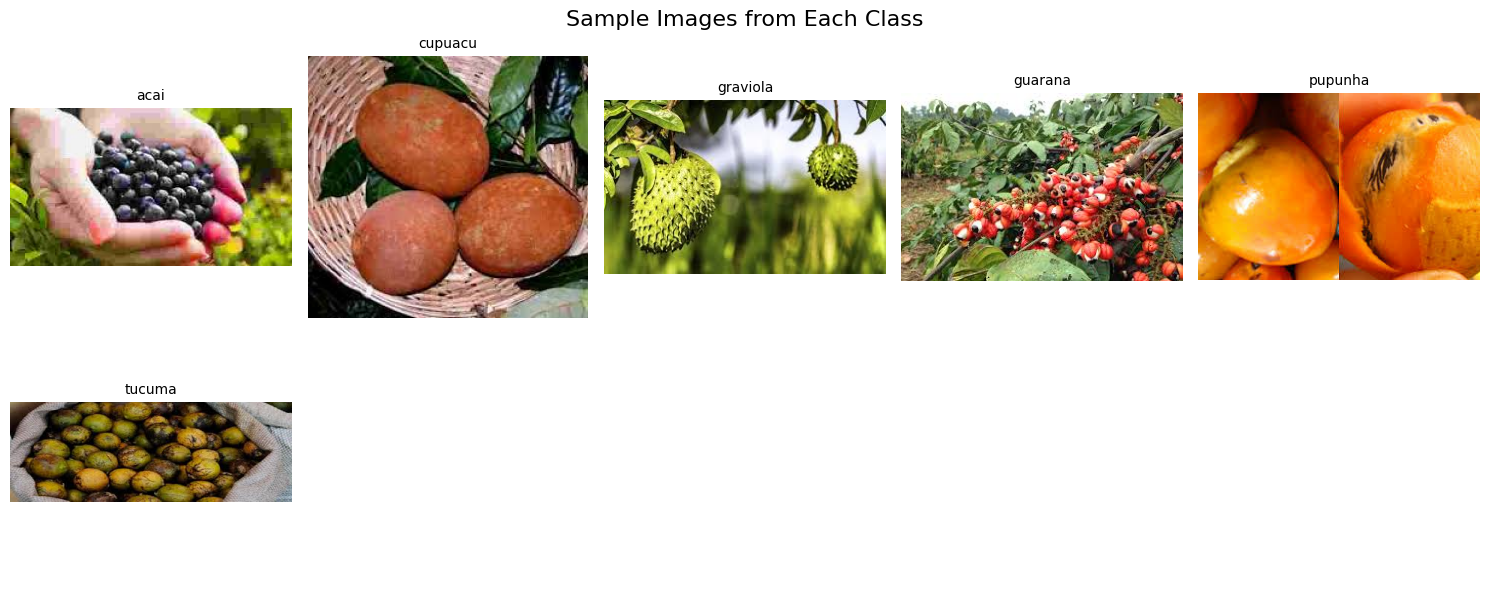

In [8]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/ai ml/week5/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


What did you Observe?

Each image represents a different class, confirming correct dataset structure.
Images vary in resolution, lighting, and orientation.
Some classes may have fewer images, indicating dataset imbalance.
Preprocessing (resizing, normalization) may be needed for consistency.

In [12]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/ai ml/week5/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [13]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Dipendra Timalsina.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 774ms/step - accuracy: 0.1250 - loss: 2.2355
Epoch 1: val_loss improved from inf to 1.81937, saving model to Dipendra Timalsina.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1250 - loss: 2.2916 - val_accuracy: 0.1667 - val_loss: 1.8194
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.3241 - loss: 1.7134
Epoch 2: val_loss improved from 1.81937 to 1.23156, saving model to Dipendra Timalsina.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 582ms/step - accuracy: 0.3299 - loss: 1.7168 - val_accuracy: 0.8333 - val_loss: 1.2316
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.2888 - loss: 1.6384
Epoch 3: val_loss did not improve from 1.23156
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 596ms/step - accuracy: 0.2964 - loss: 1.6348 - val_accuracy: 0.2222 - val_loss: 1.7927
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.2975 - loss: 1.6432
Epoch 4: val_loss did not improve from 1.23156
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 807ms/step - accuracy: 0.3134 - loss: 1.6216 - val_accuracy: 0.5000 - val_loss: 1.2831
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.5399 - loss: 1.2299
Epoch 5: val_loss did not improve from 1.23156
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step - accuracy: 0.5404 - loss: 1.2254 - val_accuracy: 0.5000 - val_loss: 1.3931
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.5075 - loss: 1.2647
Epoch 6: val_loss did not improve from 1.23156
3/3 ━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 552ms/step - accuracy: 0.7982 - loss: 0.7889 - val_accuracy: 0.7222 - val_loss: 0.8745
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.7344 - loss: 0.6975
Epoch 9: val_loss improved from 0.87448 to 0.79534, saving model to Dipendra Timalsina.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 766ms/step - accuracy: 0.7383 - loss: 0.6967 - val_accuracy: 0.7222 - val_loss: 0.7953
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.9398 - loss: 0.4264
Epoch 10: val_loss did not improve from 0.79534
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 804ms/step - accuracy: 0.9410 - loss: 0.4238 - val_accuracy: 0.6111 - val_loss: 0.9730
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.9398 - loss: 0.3139
Epoch 11: val_loss improved from 0.79534 to 0.72456, saving model to Dipendra Timalsina.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 641ms/step - accuracy: 0.9410 - loss: 0.3062 - val_accuracy: 0.8333 - val_loss: 0.7246
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9699 - loss: 0.2057
Epoch 12: val_loss did not improve from 0.72456
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 535ms/step - accuracy: 0.9705 - loss: 0.2017 - val_accuracy: 0.8333 - val_loss: 0.8067
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 1.0000 - loss: 0.1237
Epoch 13: val_loss improved from 0.72456 to 0.66778, saving model to Dipendra Timalsina.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 735ms/step - accuracy: 1.0000 - loss: 0.1219 - val_accuracy: 0.8333 - val_loss: 0.6678
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 1.0000 - loss: 0.0621
Epoch 14: val_loss improved from 0.66778 to 0.60180, saving model to Dipendra Timalsina.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 523ms/step - accuracy: 1.0000 - loss: 0.0616 - val_accuracy: 0.7778 - val_loss: 0.6018
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 707ms/step - accuracy: 1.0000 - loss: 0.0392
Epoch 15: val_loss improved from 0.60180 to 0.50305, saving model to Dipendra Timalsina.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 963ms/step - accuracy: 1.0000 - loss: 0.0392 - val_accuracy: 0.8889 - val_loss: 0.5031
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 1.0000 - loss: 0.0257
Epoch 16: val_loss did not improve from 0.50305
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 608ms/step - accuracy: 1.0000 - loss: 0.0254 - val_accuracy: 0.8889 - val_loss: 0.5562
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 1.0000 - loss: 0.0174
Epoch 17: val_loss improved from 0.50305 to 0.48345, saving model to Dipendra Timalsina.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 647ms/step - accuracy: 1.0000 - loss: 0.0170 - val_accuracy: 0.8889 - val_loss: 0.4834
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 1.0000 - loss: 0.0090
Epoch 18: val_loss did not improve from 0.48345
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 468ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 0.8889 - val_loss: 0.5091
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 914ms/step - accuracy: 1.0000 - loss: 0.0062
Epoch 19: val_loss did not improve from 0.48345
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 0.8889 - val_loss: 0.5237
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 1.0000 - loss: 0.0048
Epoch 20: val_loss did not improve from 0.48345
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 573ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.8889 - val_loss: 0.5245
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 1.0000 - loss: 0.0037
Epoch 21: val_loss did not improve from 0.48345
3/3 ━━━

In [17]:
test_dir = '/content/drive/MyDrive/ai ml/week5/FruitinAmazon'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 120 files belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.1983 - loss: 1362.2172
Test Loss: 1347.410400390625
Test Accuracy: 0.18333333730697632


In [18]:

model.save('dipendra_timalsina_model.h5')
print("Model saved successfully!")


Model saved successfully!


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.10      0.13        30
           1       0.59      0.22      0.32        90
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.19       120
   macro avg       0.13      0.05      0.08       120
weighted avg       0.49      0.19      0.27       120

Epoch 1/250


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 1.0000 - loss: 0.0102
Epoch 1: val_loss did not improve from 0.48345
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 802ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 0.8333 - val_loss: 0.5745
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 1.0000 - loss: 0.0101
Epoch 2: val_loss did not improve from 0.48345
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 528ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 0.8889 - val_loss: 0.5079
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 1.0000 - loss: 0.0084
Epoch 3: val_loss did not improve from 0.48345
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 522ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 0.8889 - val_loss: 0.5094
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 1.0000 - loss: 0.0053
Epoch 4: val_loss did not improve from 0.48345
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 496ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.8889 - val_loss: 0.5229
Epoch 5/250
3/3 ━━━━━━━━

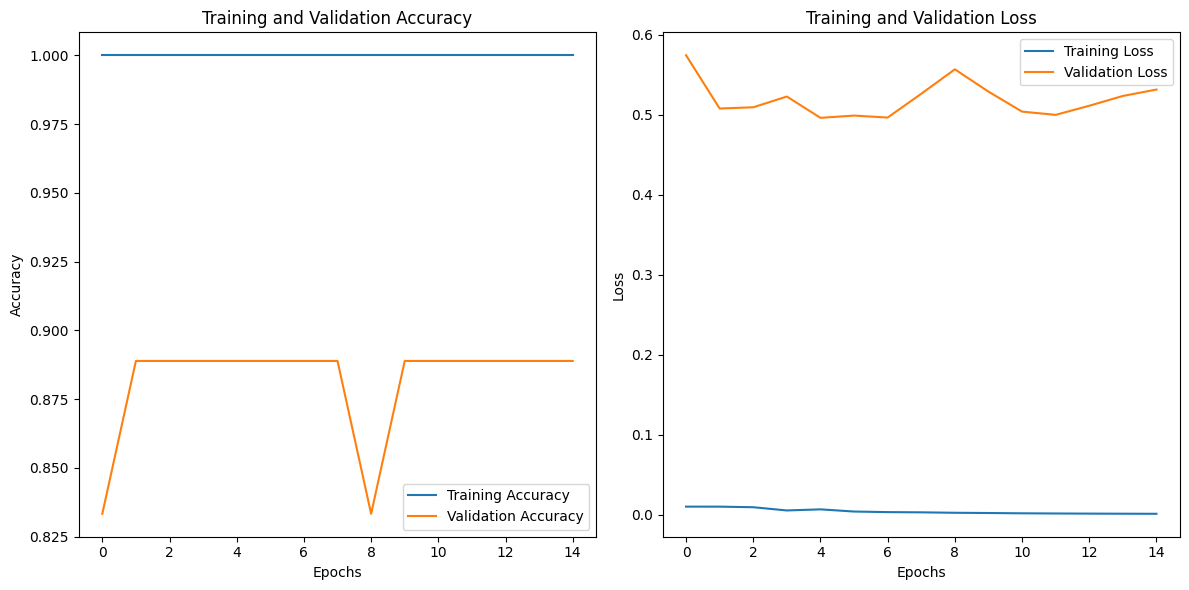

Model saved as 'dipendra_timalsina_model.h5'


In [20]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('dipendra_timalsina_model.h5')
print("Model saved as 'dipendra_timalsina_model.h5'")
